In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
cloth0_dir_names = []
cloth1_dir_names = []
cloth2_dir_names = []

for dir in sorted(os.listdir("/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/0cloth_vertrub_auto")):
    cloth0_dir_names.append("/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/0cloth_vertrub_auto/"+dir)

for dir in sorted(os.listdir("/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/1cloth_vertrub_auto")):
    cloth1_dir_names.append("/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/1cloth_vertrub_auto/"+dir)

for dir in sorted(os.listdir("/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/2cloth_vertrub_auto")):
    cloth2_dir_names.append("/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/2cloth_vertrub_auto/"+dir)

In [34]:
def get_data(dir_name):
    file_name = dir_name+"/reskin_data.csv"
    data = np.loadtxt(file_name, delimiter = ",")
    data = data[:,:-1]
    return data

def get_data_XY(dir_name):
    file_name = dir_name+"/reskin_data_estim_gt.csv"
    data = np.loadtxt(file_name, delimiter = ",")
    X = data[:,:-1]
    Y = np.reshape(data[:,-1],(-1,1))
    return X,Y

def plot_magnetometer(data):
    fig, axes = plt.subplots(nrows = 5, ncols = 1, sharex = True)
    names = {0:"Center", 1: "Top", 2: "Right", 3: "Bottom", 4: "Left"}
    for i in range(5):
        axes[i].plot(data[:,i*3], 'r', label="Bx")
        axes[i].plot(data[:,i*3+1], 'g', label = "By")
        axes[i].plot(data[:,i*3+2], 'b', label = "Bz")
        axes[i].set_title(names[i])
        pass
    lines, labels = fig.axes[-2].get_legend_handles_labels()
    fig.legend(lines, labels, loc = 'lower right', fontsize =12.0)
    fig.tight_layout(pad=0.5)
    fig.text(0.04, 0.5, 'Magnetometer Data', va='center', rotation='vertical', fontsize = 14.0)
    fig.set_size_inches(20, 11.3)  
    plt.show()

def plot_diff(data):
    fig, axes = plt.subplots(nrows = 5, ncols = 1, sharex = True)
    names = {0:"Center", 1: "Top", 2: "Right", 3: "Bottom", 4: "Left"}
    dx = 0.001
    for i in range(5):
        axes[i].plot(np.diff(data[:,i*3])/dx, 'r', label="Bx")
        axes[i].plot(np.diff(data[:,i*3+1])/dx, 'g', label = "By")
        axes[i].plot(np.diff(data[:,i*3+2])/dx, 'b', label = "Bz")
        axes[i].set_title(names[i])
        pass
    lines, labels = fig.axes[-2].get_legend_handles_labels()
    fig.legend(lines, labels, loc = 'lower right', fontsize =12.0)
    fig.tight_layout(pad=0.5)
    fig.text(0.04, 0.5, 'Magnetometer Data', va='center', rotation='vertical', fontsize = 14.0)
    fig.set_size_inches(20, 11.3)  
    plt.show()

def plot_norm(data):
    fig = plt.figure()
    sqdata = np.square(data)
    norm_data = np.abs(np.diff(np.mean(sqdata, axis = 1)))
    plt.plot(norm_data, 'r', label="norm")
    fig.set_size_inches(20, 11.3)  
    plt.show()

def plot_magnetometers_with_label(data):
    fig, axes = plt.subplots(nrows = 6, ncols = 1, sharex = True)
    names = {0:"Center", 1: "Top", 2: "Right", 3: "Bottom", 4: "Left"}
    axes[-1].plot(data[:,-1], 'black', label="Contact Data")
    for i in range(5):
        axes[i].plot(data[:,i*3], 'r', label="Bx")
        axes[i].plot(data[:,i*3+1], 'g', label = "By")
        axes[i].plot(data[:,i*3+2], 'b', label = "Bz")
        axes[i].set_title(names[i])
        pass
    lines, labels = fig.axes[-2].get_legend_handles_labels()
    fig.legend(lines, labels, loc = 'lower right', fontsize =12.0)
    fig.tight_layout(pad=0.5)
    fig.text(0.04, 0.5, 'Magnetometer Data', va='center', rotation='vertical', fontsize = 14.0)
    fig.set_size_inches(20, 11.3)  
    plt.show()

[[ 1470.45007324   347.1000061     99.22000122 ... -3255.90014648
   -444.75003052  -184.88800049]
 [ 1470.45007324   343.05001831   107.44799805 ... -3255.75024414
   -440.25003052  -174.96600342]
 [ 1473.90002441   339.15002441   103.5759964  ... -3263.70019531
   -445.80001831  -178.59599304]
 ...
 [ 1490.40002441   345.90002441   103.81800079 ... -3284.55004883
   -448.05001831  -175.69200134]
 [ 1494.30004883   344.70001221   103.09200287 ... -3278.40014648
   -441.15002441  -182.95199585]
 [ 1493.40002441   341.25         109.38400269 ... -3275.70019531
   -443.55001831  -184.88800049]]


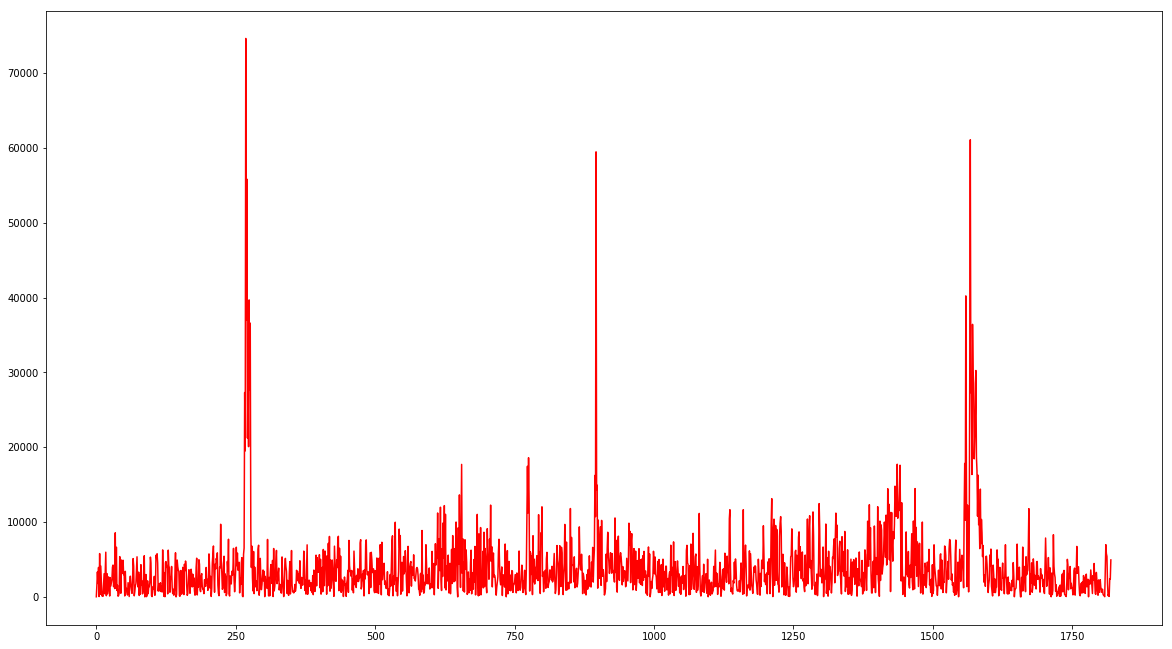

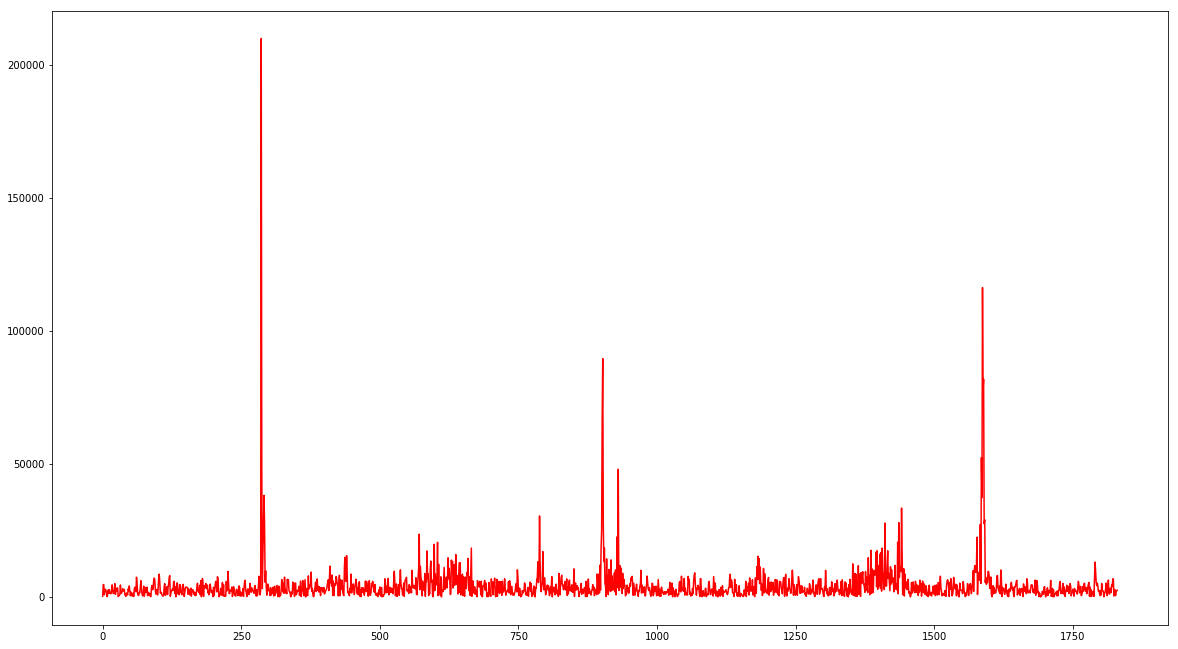

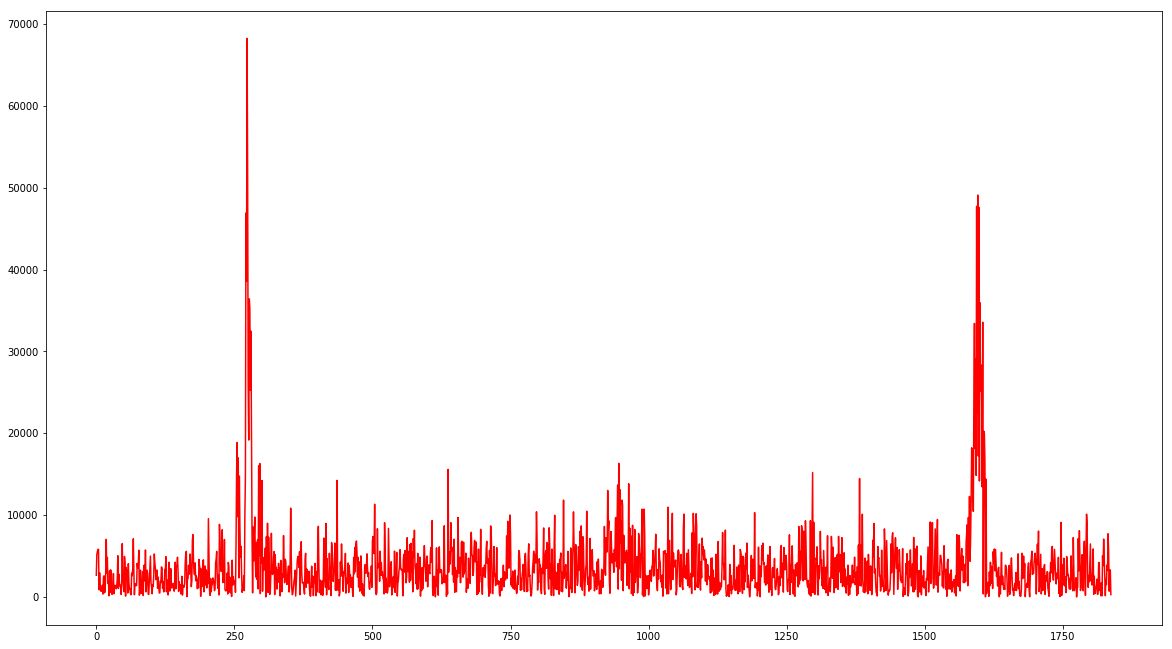

In [5]:
d1 = get_data(cloth0_dir_names[0])
d2 = get_data(cloth1_dir_names[0])
d3 = get_data(cloth2_dir_names[0])
print(d1)
# plot_magnetometer(d2)
plot_norm(d2)
# plot_magnetometer(d1)
plot_norm(d1)
# plot_magnetometer(d3)
plot_norm(d3)

In [88]:
def label_data(data, label):
    init_data = data[:400,:]
    sqdata = np.square(init_data)
    diff_norm_data = np.abs(np.diff(np.mean(sqdata, axis = 1)))
    init_index = np.argmax(diff_norm_data)
    final_data = data[-400:,:]
    sqdata = np.square(final_data)
    diff_norm_data = np.abs(np.diff(np.mean(sqdata, axis = 1)))
    final_index = (data.shape[0] - 400)+np.argmax(diff_norm_data)
    labels = np.reshape(np.zeros(data.shape[0]),(-1,1))
    labels[init_index:final_index,0] = label
    labelled_data = np.hstack([data,labels])
    return labelled_data

    
    
    

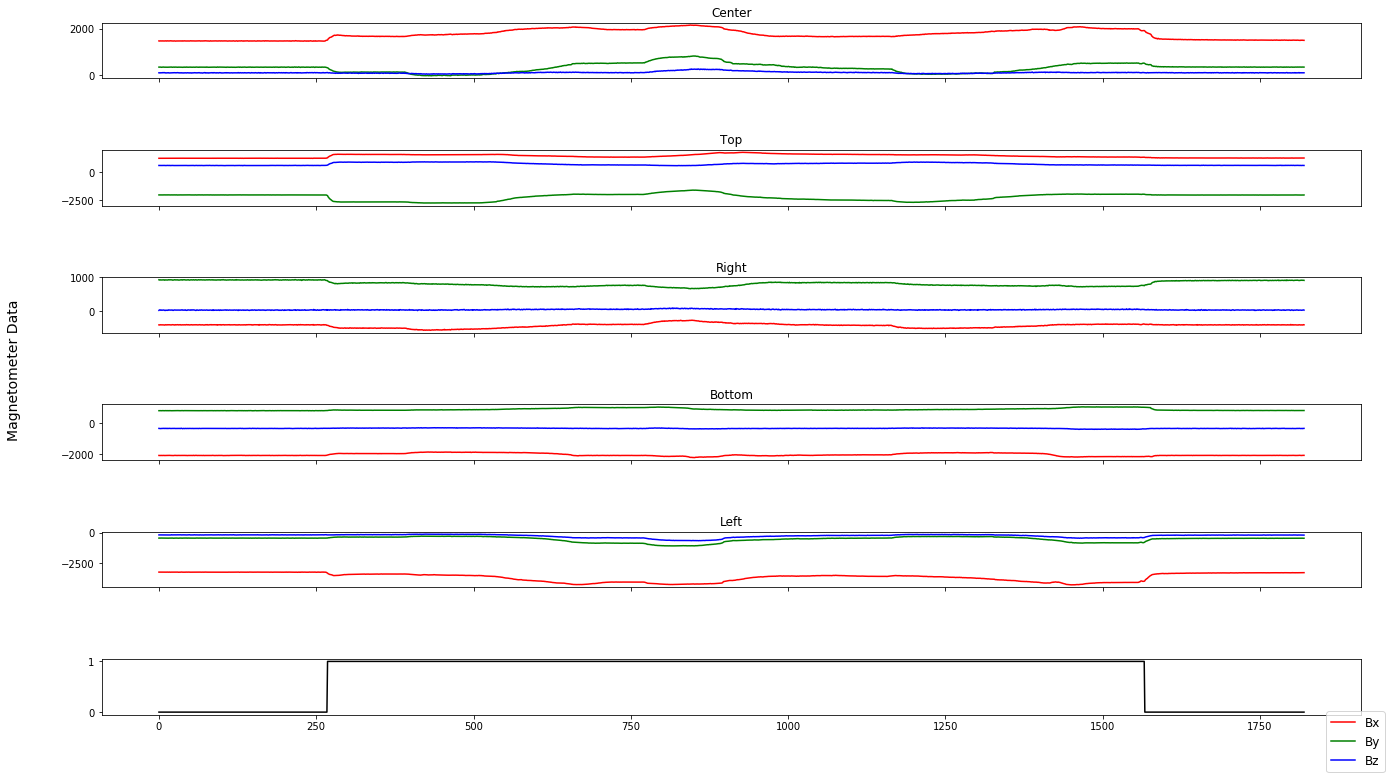

In [92]:
d3l = label_data(d2,1)
plot_magnetometers_with_label(d3l)

In [95]:
# for folder in cloth0_dir_names:
#     fn = folder+"/reskin_data_estim_gt.csv"
#     d = get_data(folder)
#     dl = label_data(d,1)
#     np.savetxt(fn,dl,delimiter=",")

# for folder in cloth1_dir_names:
#     fn = folder+"/reskin_data_estim_gt.csv"
#     d = get_data(folder)
#     dl = label_data(d,2)
#     np.savetxt(fn,dl,delimiter=",")

# for folder in cloth2_dir_names:
#     fn = folder+"/reskin_data_estim_gt.csv"
#     d = get_data(folder)
#     dl = label_data(d,3)
#     np.savetxt(fn,dl,delimiter=",")
#aking change

In [59]:
num_train = 10
num_test = 5
train_dir_names = cloth0_dir_names[0:num_train] + cloth1_dir_names[0:num_train] + cloth2_dir_names[0:num_train]
test_dir_names = cloth0_dir_names[num_train:] + cloth1_dir_names[num_train:] + cloth2_dir_names[num_train:]

train_dir_names_str = ""
for dir_name in train_dir_names:
    train_dir_names_str = train_dir_names_str + dir_name +"\n"

test_dir_names_str = ""
for dir_name in test_dir_names:
    test_dir_names_str = test_dir_names_str + dir_name +"\n"

with open("test_dir_names.txt", "w") as fn:
    fn.write(test_dir_names_str)
    
with open("train_dir_names.txt", "w") as fn:
    fn.write(train_dir_names_str)

In [40]:
X = []
Y = []
x_test = []
y_test = []
for dir_name in train_dir_names:
    x,y = get_data_XY(dir_name)
    X.append(x)
    Y.append(y)
X = np.vstack(X)
Y = np.vstack(Y)
print(X.shape, Y.shape)

for dir_name in test_dir_names:
    x,y = get_data_XY(dir_name)
    x_test.append(x)
    y_test.append(y)
x_test = np.vstack(x_test)
y_test = np.vstack(y_test)
print(x_test.shape, y_test.shape)

((54258, 15), (54258, 1))
((27052, 15), (27052, 1))


In [41]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
x_test = scaler.transform(x_test)


In [42]:
clf = neighbors.KNeighborsClassifier(10, weights="distance")
clf.fit(X, Y)
y_pred = clf.predict(x_test)
from sklearn.metrics import balanced_accuracy_score
score = balanced_accuracy_score(y_test, y_pred)
print("balanced accuracy: ",score)
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
best_cf = confusion_matrix(y_test, y_pred)
print(best_cf)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


('balanced accuracy: ', 0.9981298742022954)
[[7484    3    4   18]
 [   1 6529    3    0]
 [  21    0 6477    0]
 [   2    0    0 6510]]


In [75]:
def save_clf_data(dir_name, normalizer):
    file_name = dir_name+"/reskin_data_estim_gt.csv"
    file_name2 = dir_name+"/reskin_data.csv"
    save_name = dir_name+"/reskin_data_clf.csv"
    data = np.loadtxt(file_name, delimiter = ",")
    data2 =  np.loadtxt(file_name2, delimiter = ",")
    X_without_time = data[:,:-1]
    X_without_time = normalizer(X_without_time)
    Y = np.reshape(clf.predict(X_without_time),(-1,1))
    newX = np.hstack([X_without_time,Y,np.reshape(data2[:,-1],(-1,1))])
    np.savetxt(save_name, newX)

    

In [76]:
for dir_name in test_dir_names:
    save_clf_data(dir_name, scaler.transform)


Analysing plots of given data to see why we are getting such high accuracy

In [80]:
max_x_len = 0
max_y_len= 0 
all_dir_names = train_dir_names+test_dir_names
for dir_name in all_dir_names:
    x,y = get_data_XY(dir_name)
    if(max_x_len < x.shape[0]):
        max_x_len = x.shape[0]
    if(max_y_len < y.shape[0]):
        max_y_len = y.shape[0]
print(max_x_len, max_y_len)

(1845, 1845)


In [150]:
cloth0_datas = []
cloth1_datas = []
cloth2_datas = []

def pad_time_series(data, new_len):
    val = new_len - data.shape[0]
    if(val%2 == 0):
        left_pad_values = int(val/2)
        right_pad_values = int(val/2)
    elif(val%2 == 1):
        left_pad_values = int(val/2)
        right_pad_values = int(val/2)+1
    new_data = np.zeros((new_len, 15))
    for j in range(data.shape[1]):
        new_data[:,j] = np.pad(data[:,j], (left_pad_values, right_pad_values), mode = "edge")
    return new_data

for dir_name in cloth0_dir_names:
    x,y = get_data_XY(dir_name)
    x = pad_time_series(x, max_x_len)
    cloth0_datas.append(x)

for dir_name in cloth1_dir_names:
    x,y = get_data_XY(dir_name)
    x = pad_time_series(x, max_x_len)
    cloth1_datas.append(x)

for dir_name in cloth2_dir_names:
    x,y = get_data_XY(dir_name)
    x = pad_time_series(x, max_x_len)
    cloth2_datas.append(x)


In [123]:
cloth0_mean_x = np.zeros((max_x_len,15))
cloth0_max_x = np.ones((max_x_len,15))*-100000
cloth0_min_x = np.ones((max_x_len,15))*100000
for j in range(len(cloth0_datas)):
    cloth0_mean_x = cloth0_mean_x + cloth0_datas[j]
    vals = cloth0_max_x < cloth0_datas[j]
    cloth0_max_x = np.where(vals, cloth0_datas[j], cloth0_max_x)
    vals = cloth0_min_x > cloth0_datas[j]
    cloth0_min_x = np.where(vals, cloth0_datas[j], cloth0_min_x)
cloth0_mean_x = cloth0_mean_x/15


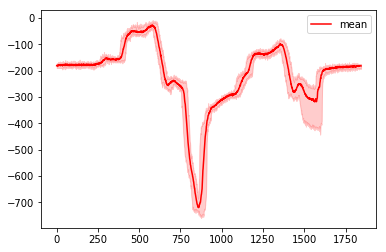

In [136]:
fig = plt.figure()
ind = 14
xdat = np.arange(0,cloth0_mean_x.shape[0],1)
plt.plot(xdat,cloth0_mean_x[:,ind],'r',label="mean")
plt.fill_between(xdat,cloth0_max_x[:,ind],cloth0_min_x[:,ind],color='red', alpha=0.2)
plt.legend()
plt.show()

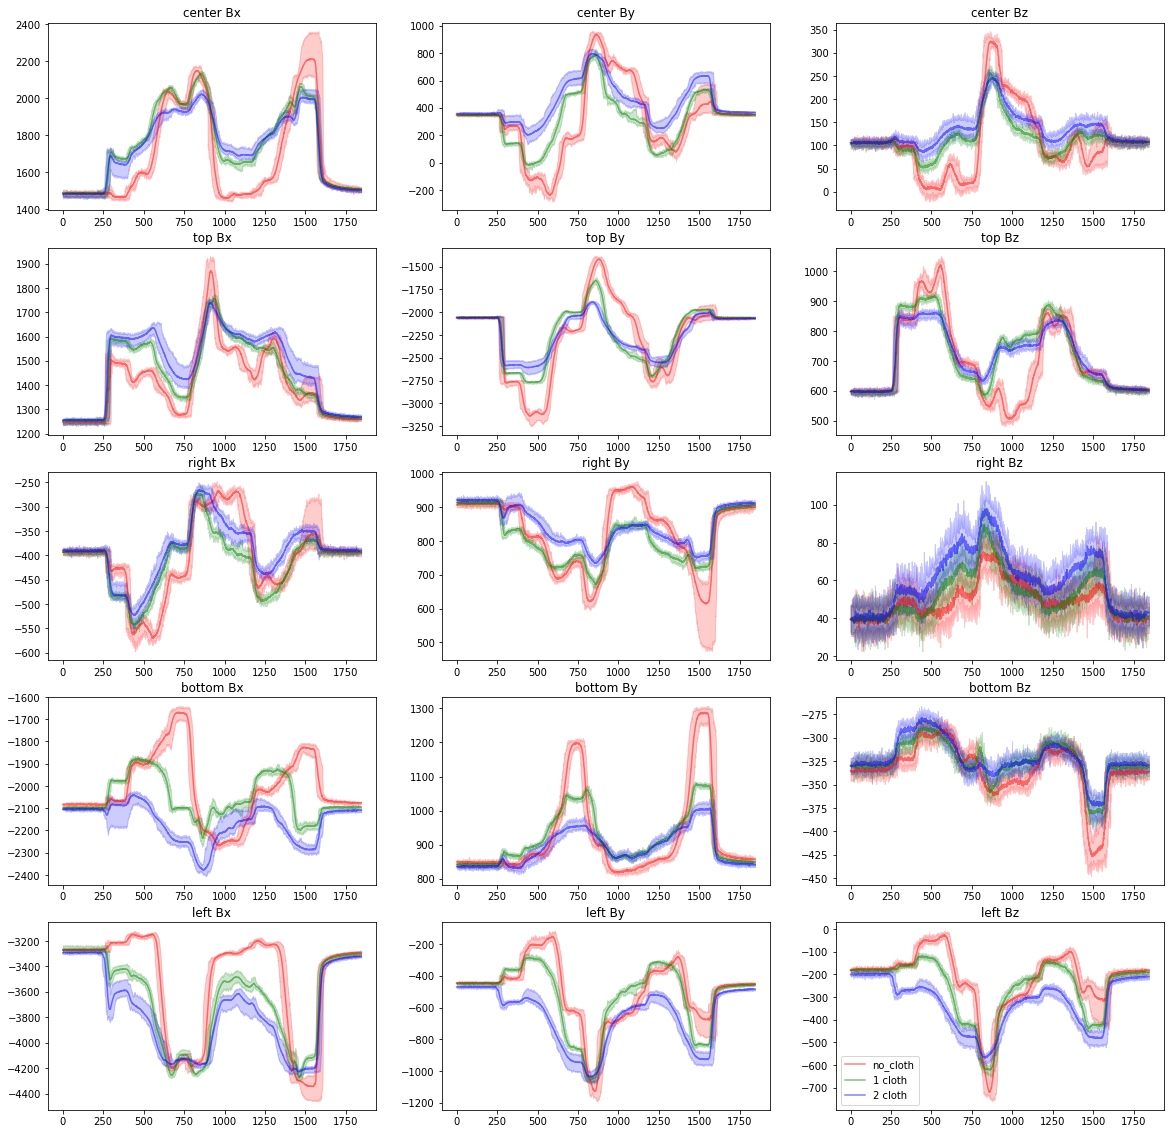

In [162]:
def mean_min_max(datas):
    mean_x = np.zeros((max_x_len,15))
    max_x = np.ones((max_x_len,15))*-100000
    min_x = np.ones((max_x_len,15))*100000
    for j in range(len(datas)):
        mean_x = mean_x + datas[j]
        vals = max_x < datas[j]
        max_x = np.where(vals, datas[j], max_x)
        vals = min_x > datas[j]
        min_x = np.where(vals, datas[j], min_x)
    mean_x = mean_x/15
    return mean_x, min_x, max_x
def get_title(i,j):
    dict1 = {0:"center", 1:"top", 2:"right", 3:"bottom", 4:"left"}
    dict2 = {0:"Bx", 1:"By", 2:"Bz"}
    return dict1[i]+" "+dict2[j]
def plot_variance(datas1, datas2, datas3):
    mean1, min1, max1 = mean_min_max(datas1)
    mean2, min2, max2 = mean_min_max(datas2)
    mean3, min3, max3 = mean_min_max(datas3)
    xdat = np.arange(0,mean1.shape[0],1)
    fig,axes = plt.subplots(5,3)
    for i in range(5):
        for j in range(3):
            axes[i,j].plot(xdat,mean1[:,3*i+j],'r', label = "no_cloth", alpha = 0.5)
            axes[i,j].plot(xdat,mean2[:,3*i+j],'g', label = "1 cloth", alpha = 0.5)
            axes[i,j].plot(xdat,mean3[:,3*i+j],'b', label = "2 cloth", alpha = 0.5)
            axes[i,j].fill_between(xdat,max1[:,3*i+j],min1[:,3*i+j],color='red', alpha=0.2)
            axes[i,j].fill_between(xdat,max2[:,3*i+j],min2[:,3*i+j],color='green', alpha=0.2)
            axes[i,j].fill_between(xdat,max3[:,3*i+j],min3[:,3*i+j],color='blue', alpha=0.2)
            axes[i,j].set_title(get_title(i,j))
    fig.set_size_inches(20, 20)  
    plt.legend()
    plt.show()
    
    
plot_variance(cloth0_datas, cloth1_datas, cloth2_datas)
    
    

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])